# Problem set 3

Amanda Conley

Problem Set 3

March 11, 2020

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
Hypothesis 1
Years of education will change negatively as father's SES increases. 
Education measures the number of years of education completed; father's SES capture the father's indexed socioeconomic status.
    
Hypothesis 2
Education will change negatively when sex is female and race and is non-white.
Education measures the number of years of education completed; sex captures binary sex categories and race captures white, black and other racial categories.

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.

The example on quadratic forms really interested me-- I've been thinking about it a lot. Due to this, I believe there is a possibility that  hypothesis 1 will demonstrate a possible quadratic form. I am curious after our in-class demonstration if race and sex also have non-linear relationships with education instead of of income and may also take on a nominal form, as noted in hypothesis 2.
  
   
    C. State your explanation why (theory) you make the predictions in A. and B.
    
Hypothesis 1
I think it is possible that the more high-status a parent, the more likely it is that children can be financially successful, via social capital, without obtaining post-graduate education. I think this may take on a quadratic form.

Hypothesis 2
I think that race and sex, nominal variables, my have the same effect on education as they do on income.    

    D. Tell us the source of your data and describe its sample.
    
The dataset is from the General Social Survey 2018, which captures a sample of the United State population.

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [31]:
use GSS2018w7.dta
*clear any stored regression results
qui est clear

*Model 1 - no quadritic
qui eststo: regress educ PASEI10

*Model 2 - quadratic added
gen PASEI10_R=PASEI10^2
qui eststo: regress educ PASEI10 PASEI10_R

**Print a table with the two models
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


no; data in memory would be lost


r(4);
r(4);


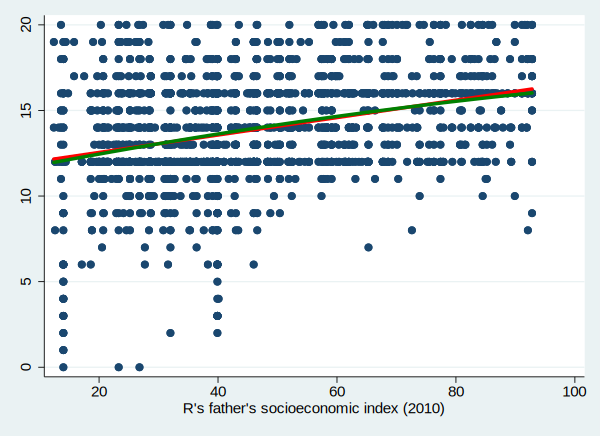

In [30]:
tw (scatter educ PASEI10, sort) ///
(lfit educ PASEI10, color(red) lwidth(thick)) ///
(qfit educ PASEI10, color(green) lwidth(thick)), ///
legend(off) name(quadratic, replace)

In [20]:
xi i.sex i.race, noomit

In [21]:
%head sex  _I* if _n<6

,sex,_Isex_1,_Isex_2,_Irace_1,_Irace_2,_Irace_3
1,male,1,0,1,0,0
2,female,0,1,1,0,0
3,male,1,0,1,0,0
4,female,0,1,1,0,0
5,male,1,0,0,1,0


In [22]:
xi: reg educ ib1.sex ib1.race


      Source |       SS           df       MS      Number of obs   =     2,345
-------------+----------------------------------   F(3, 2341)      =     17.40
       Model |  452.302729         3  150.767576   Prob > F        =    0.0000
    Residual |  20283.9804     2,341  8.66466486   R-squared       =    0.0218
-------------+----------------------------------   Adj R-squared   =    0.0206
       Total |  20736.2832     2,344  8.84653718   Root MSE        =    2.9436

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
     female  |   .0746197   .1223104     0.61   0.542    -.1652282    .3144676
             |
        race |
      black  |   -.610871   .1664799    -3.67   0.000    -.9373343   -.2844076
      other  |  -1.294809    .193222    -6.70   0.000    -1.673713   -.9159044
     



Adjusted predictions                            Number of obs     =      2,345
Model VCE    : OLS

Expression   : Linear prediction, predict()
at           : 1.sex           =    .4481876 (mean)
               2.sex           =    .5518124 (mean)
               1.race          =    .7215352 (mean)
               2.race          =    .1637527 (mean)
               3.race          =    .1147122 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        race |
      white  |   13.98033   .0715643   195.35   0.000        13.84    14.12067
      black  |   13.36946    .150291    88.96   0.000     13.07474    13.66418
      other  |   12.68552   .1794903    70.68   0.000     12.33355     13.0375
------------------------------------------------------------------

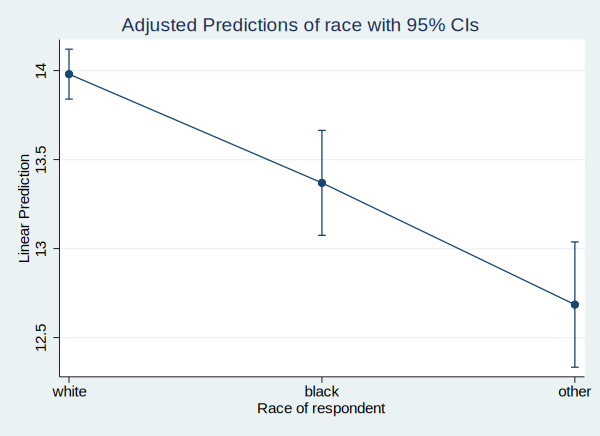




  Variables that uniquely identify margins: race


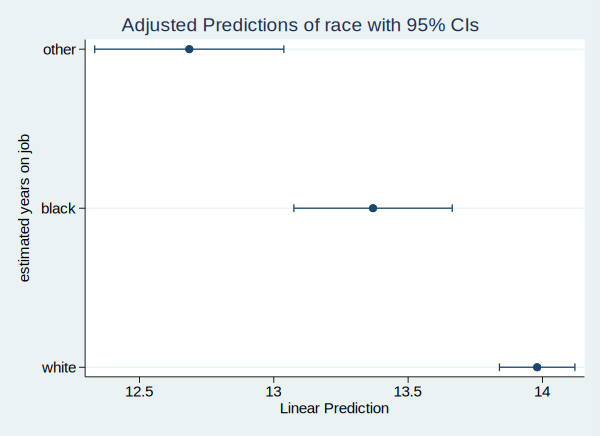

In [25]:
margins i.race, atmeans
marginsplot
marginsplot, horizontal unique recast(scatter) ytitle(estimated years on job)

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    B. Say whether a linear or particular non-linear model best describes your data and why

In [ ]:
The results do not support hypothesis 1. However, the results do demonstrate that there isn't necessarily a perfectly linear relationship between 
education and father's SES. Yet, you could make an arugment that it is more linear than not and that a linear model best fits.

The results do not support hypothesis 2. Race and sex do not have the same non-linear relationship with education than they do with income. 

